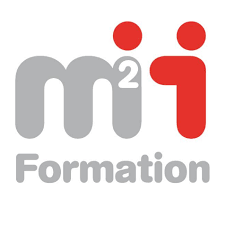

Théoriquement, web scraping est la pratique de la collecter les données des pages internet pour les traiter, les stocker et les analyser.

In [ ]:
from urllib.request import urlopen

In [ ]:
html = urlopen('https://www.tripadvisor.fr/')
print(html.read())

b'<!DOCTYPE html><html lang="fr"><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><meta http-equiv="content-language" content="fr"/><link rel="icon" id="favicon" href="https://static.tacdn.com/favicon.ico?v2" type="image/x-icon"/><link rel="mask-icon" sizes="any" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" color="#000000"/><meta name="theme-color" content="#34e0a1"/><meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover"/><meta name="format-detection" content="telephone=no"/><meta property="al:ios:app_name" content="TripAdvisor"/><meta property="al:ios:app_store_id" content="284876795"/><meta property="twitter:app:id:ipad" name="twitter:app:id:ipad" content="284876795"/><meta property="twitter:app:id:iphone" name="twitter:app:id:iphone" content="284876795"/><meta property="al:ios:url" content="tripadvisor://www.tripadvisor.fr/?m=33762"/><meta property="twitter:app:url:ipad" name="twitter:a

Cette commande affiche le code HTML de la page dont l'URL est https://www.tripadvisor.fr/ qui correspond au fichier index.html en général. Les pages HTML contiennent plusieurs ressources comme les images, les fichiers JavaScript, les fichiers CSS. Quand le navigateur rencontre une balise telle que ```<img src='profile.jpg">```, le navigateur sait qu'il doit envoyer une autre requête au serveur web afin de récupérer les données de l'image pour l'afficher sur la page.

Le package Python **request** contient plusieurs fonctions qui permettent de demander des données à travers le web.

La fonction **urlopen** est utilisée afin d'ouvrir un objet distant à travers le réseau et le lire, elle peut lire les fichiers HTML, les images, ou tout autre flux "stream".

# BeautifulSoup

Le package BeautifulSoup a été nommé d'après le poème de Lewis Carroll, il est utilisé pour formater et organiser les pages web et corriger les erreurs HTML et nous retourner des objets Python représentant des structures XML.

**Installer BeautifulSoup**

```pip install beautifulsoup4```

Pour s'assurer que le package a été bien installé, il suffit d'essayer de l'importer:

```from bs4 import BeautifulSoup```


In [ ]:
!pip install beautifulsoup4

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://www.tripadvisor.fr/')
bs = BeautifulSoup(html.read(), 'html.parser')
print(bs.title)

<title>Tripadvisor - lisez des avis, comparez les prix et réservez</title>


In [ ]:
bs

<!DOCTYPE html>
<html lang="fr"><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="fr" http-equiv="content-language"/><link href="https://static.tacdn.com/favicon.ico?v2" id="favicon" rel="icon" type="image/x-icon"/><link color="#000000" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" rel="mask-icon" sizes="any"/><meta content="#34e0a1" name="theme-color"/><meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/><meta content="telephone=no" name="format-detection"/><meta content="TripAdvisor" property="al:ios:app_name"/><meta content="284876795" property="al:ios:app_store_id"/><meta content="284876795" name="twitter:app:id:ipad" property="twitter:app:id:ipad"/><meta content="284876795" name="twitter:app:id:iphone" property="twitter:app:id:iphone"/><meta content="tripadvisor://www.tripadvisor.fr/?m=33762" property="al:ios:url"/><meta content="tripadvisor://www.tripadvisor.fr/?m=337

La commande permet de retourner les premier élément si plusieurs occurrences sont contenues dans le fichier HTML.

Les fonctions urlopen et html.read() afin de récupérer le contenu HTML. BeautifulSoup peut aussi utiliser directement l'objet obtenu à l'aide de urlopen sans faire appel à la fonction read.

```bs = BeautifulSoup(html, 'html.parser')```

L'objet retourné est un arbre hiérarchique de balises qui peuvent être accédées en enchaînant les éléments:

In [ ]:
bs.html.body.div

<div id="lithium-root"><div class="JLRLEDMy"><button class="L2IY0Z2H _2TPRUiAd" tabindex="1" type="button"><span class="HLvj7Lh5 _30O3hInS">Passer au contenu principal</span></button></div><div class="ad _1NlVEuyZ"></div><div></div><div></div><header class="_3wrX4B4P _1capNFED"><div class="_1anKb-nl"><nav class="c35hjqC_"><button aria-label="Menu" class="_3tKR4Vlr" title="Menu"><svg class="_2HBN-k68 _2JndpOur" height="1em" viewbox="0 0 24 24" width="1em"><path d="M2.038 4.511H22v2.496H2.038zM2 10.752h19.962v2.497H2zM2.014 16.992h19.962v2.496H2.014z"></path></svg></button><div class="_1gs4JsPa"><img alt="Tripadvisor" class="_1AlVlFFs" src="https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg"/></div><div class="_3_CFaclw Q6ePbErL"><div class="WmEK0bU8"><div class="i3bZ_gBa _1l0GdtUl" data-test-attribute="typeahead-SINGLE_SEARCH_NAV"><div class="_3sXsAqz5"></div><form action="/Search" class="R1IsnpX3"><input aria-label="Rechercher" autocapita

In [ ]:
bs.span

<span class="HLvj7Lh5 _30O3hInS">Passer au contenu principal</span>

Le deuxième paramètre passé spécifie le parser à utiliser pour créer l'objet. html.parser est inclu dans python3 et ne nécessite aucune installation. Un autre parser populaire est **lxml**, il permet de parser les pages en ignorant les erreurs qui peuvent se trouver dans les balises HTML.

In [ ]:
!pip install lxml

In [ ]:
bs = BeautifulSoup(html.read(), 'lxml')

Un autre parser HTML est html5lib. Comme lxml, html5lib est tolérant aux erreurs, mais il est plus lent que html.parser et lxml.

In [ ]:
bs = BeautifulSoup(html.read(), 'html5lib')

**Gestion des exceptions**

Souvent les données sont mal formatées, deux erreurs peuvent arriver:

* La page n'a pas été trouvée dans le serveur, erreur 404
* Le serveur n'a pas été trouvé, erreur 500, 503 ou 504

Dans tous les cas, la fonction urlopen va déclencher l'exception HTTPError, on peut la gérer de la manière suivante:

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError

In [ ]:
try:
  html = urlopen('https://www.tripadvisor.fr/')
except HTTPError as e:
  print(e)
else:
  print('Les programme s''est terminé avec succès.')

URLError: ignored

Dans le cas où le serveur ne peut pas être atteint:

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [ ]:
try:
  html = urlopen('https://liennonexistant.com')
except HTTPError as e:
  print(e)
except URLError as e:
  print('Le serveur est introuvable.')
else:
  print('Page accessible.')

Le serveur est introuvable.


Une autre erreur qui peut arriver lors du parcours des éléments d'une page est AttributeError. Ceci peut arriver quand l'attribut mentionné n'existe pas sur la page en question.

In [ ]:
bs.nonexisting.anotherone

AttributeError: ignored

In [ ]:
try:
  badContent = bs.nonexisting.anotherone
except AttributeError as e:
  print('Balise non trouvée')
else:
  if badContent == None:
    print('Balise non trouvée')
  else:
    print(badContent)

Balise non trouvée


In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

def getTitle(url):
  try:
    html = urlopen(url)
  except HTTPError as e:
    return None
  
  try:
    bs = BeautifulSoup(html.read(), 'html.parser')
    title = bs.body.h1
  except AttributeError as e:
    return None
  
  return title

title = getTitle('https://tripadvisor.com')

if title == None:
  print('Le titre est introuvable')
else:
  print(title)

Le titre est introuvable


**Parcourir l'arbre HTML**

Les web scrapers peuvent différencier entre les balises HTML en utilisant les classes. On peut utiliser BeautifulSoup afin de parser les pages à base des classes:

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://tripadvisor.com')
bs = BeautifulSoup(html.read(), 'html.parser')

La fonction findAll permet d'extraire une liste de balises avec la classe spécifiée.

In [ ]:
nameList = bs.findAll('span', {'class': '_1Qo7YQ01'})
for name in nameList:
  print(name.get_text())

Hotels
Vacation Rentals
Things to Do
Restaurants
Write a review
Travel Forums
Flights
Cruises
Insurance
Rental Cars
Vacation Packages
Travelers' Choice
Airlines
Road Trips
Help Center
Add a Place
Hire a Trip Designer
More


**Fonctions find() et find_all()**

Les fonctions **find** et **find_all** sont les fonctions BeautifulSoup les plus utilisées, elles permettent de filtrer le contenu HTML pour trouver la liste des balises recherchées en se basant sur les attributs spécifiés.

L'argument **tag** permet de spécifier le tag ou les tags à extraire:

Par exemple:

```.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])```

permet d'extraire tous les titres quelque soit leurs niveaux.

L'argument **recursive** permet de spécifier la profondeur lors du parsing, si il est égal à False, il va chercher juste les premiers éléments de l'arborescence, sinon il va extraire l'ensemble des balises.

L'argument **attributes** accepte un dictionnaire python spécifiant les attributs et les balises contant l'un de ces attributs.

Par exemple, la fonction suivante retourne les balises span ayant l'une des classes spécifiées:

```bs.find_all('span', {'class': {'green', 'red'}})```


L'argument **text** permet de chercher à partir du contenu texte de la balise au lieu des propriétés de la balise. 

``` namelist = bs.find_all(text='hôtel') ```

L'argument **limit** permet de spécifier la profondeur de la recherche, par défaut, il a une valeur de 1. On peut l'utiliser si on est intéressé par les premiers éléments.

L'argument **keyword** permet de sélectionner les balises contenant un attribut particulier ou plusieurs attributs.

In [ ]:
title = bs.find_all(id='title', class_='text')

**Autres objets BeautifulSoup**

* BeautifulSoup objects: les variables bs
* Les objets balises: retrouvés en utilisant find et find_all
* Les objets NavigableString: utilisés pour représenter le texte à l'intérieur des balises
* L'objet Comment: Utiliser pour retrouver les commentaires à l'intérieur de la page HTML

**Les arbres de navigation**

La fonction find_all permet de trouver les balises en se basant sur leurs noms et leurs attributs. Pour retrouver les éléments quelque soit leur position dans la page HTML, il faut parcourir l'arbre de navigation.

Le package BeautifulSoup permet de manipuler la descendance d'une balise. Par exemple, bs.body.h1 permet d'accéder au titre qui est en dessous de body.

D'une manière similaire, bs.div.find_all('img') permet de chercher les images qui sont à l'intérieur du premier div.  

Pour retrouver juste les éléments children d'une balise, on peut utiliser l'attribut children pour parcourir toute la descendance.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://tripadvisor.com')
bs = BeautifulSoup(html, 'html.parser')

for child in bs.find('ul', {'class': '_1OhqYaUV'}).children:
  print(child.a)

# Et si on veut afficher juste le texte à l'intérieur des balises? ou les liens?
# Et si on veut afficher la liste des liens?

<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.jetsetter.com/" rel="noopener" target="_blank">Jetsetter</a>
<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.thefork.com/" rel="noopener" target="_blank">TheFork</a>
<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.viator.com/" rel="noopener" target="_blank">Viator</a>
<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.cruisecritic.com/" rel="noopener" target="_blank">Cruise Critic</a>
<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.seatguru.com/" rel="noopener" target="_blank">Seat Guru</a>
<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.flipkey.com/" rel="noopener" target="_blank">FlipKey</a>
<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.holidaylettings.co.uk/" rel="noopener" target="_blank">Holiday Lettings</a>
<a class="_3S6pHEQs gZ95jyA4 _38K76hiv" href="https://www.vacationhomerentals.com/" rel="noopener" target="_blank">Vacation Home Rentals</a>
<a class="_3S6pHEQs

L'attribut contents permet de retrouver le même résultat mais sous forme de liste au lieu d'un itérable.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://tripadvisor.com')
bs = BeautifulSoup(html, 'html.parser')

contents = bs.find('ul', {'class': '_1OhqYaUV'}).contents

for content in contents:
  print(content.a['href'])


https://www.jetsetter.com/
https://www.thefork.com/
https://www.viator.com/
https://www.cruisecritic.com/
https://www.seatguru.com/
https://www.flipkey.com/
https://www.holidaylettings.co.uk/
https://www.vacationhomerentals.com/
https://www.helloreco.com/


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://tripadvisor.com')
bs = BeautifulSoup(html, 'html.parser')

items = list(bs.html.strings)
print(items)


['!function(){if("PerformanceLongTaskTiming"in window){var e=window.__tti={e:[]};e.o=new PerformanceObserver((function(n){e.e=e.e.concat(n.getEntries())})),e.o.observe({entryTypes:["longtask"]})}}(),window.performance&&performance.mark&&(performance.setResourceTimingBufferSize&&performance.setResourceTimingBufferSize(1e3),performance.mark("visible"===document.visibilityState?"visible":"hidden"),document.addEventListener&&document.addEventListener("visibilitychange",(function(){performance.mark("visible"===document.visibilityState?"visible":"hidden")}),!1),window.addEventListener("load",(function(){performance.mark("load")}),!0)),function(e,n){var i,t,o,r=[],c={passive:!0,capture:!0},a=new Date,f="pointerup",s="pointercancel";function u(e,r){i||(i=r,t=e,o=new Date,p(n),m())}function m(){t>=0&&t<o-a&&(r.forEach((function(e){e(t,i)})),r=[])}function d(i){if(i.cancelable){var t=(i.timeStamp>1e12?new Date:performance.now())-i.timeStamp;"pointerdown"==i.type?function(i,t){function o(){u(i,t)

**Manipulation des siblings**

La fonction **next_siblings** permet de retrouver l'ensemble des éléments en dessous et peut être utile pour récupérer les lignes d'une table.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://fr.finance.yahoo.com/devises/convertisseur/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAKkrQYC_vs8disIHXzZHAWHL8abCfmGOj7ptBW1KtE8NgklG9LR3X1IXuWVr4zu5Bk6ZgKumr1m0g3Kf7CdfumJme40lDzV5N04-1_GcBXlknefmKILLjnV67lr82s0tBiW2hMC3_I3HowkwDZc5oeqwjwIhDaevao3AnfZNmH1n')
bs = BeautifulSoup(html, 'html.parser')

for sibling in bs.find('table', {'data-reactid': '242'}).tr.next_siblings:
  print(siblings)

# Scrapy

Le framework **scrapy** est parmi les meilleurs pour développer des crawlers, il permet d'automatiser les tâches répétitives telles que la recherche des liens dans une page, évaluation des liens internes et externes, pagination...

**Installation de scrapy**

In [1]:
!pip install scrapy

     |████████████████████████████████| 245kB 6.8MB/s 
     |████████████████████████████████| 3.1MB 13.1MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 3.2MB 36.2MB/s 
     |████████████████████████████████| 245kB 39.4MB/s 
     |████████████████████████████████| 2.6MB 26.8MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
  Created wheel for protego: filename=Protego-0.1.16-cp36-none-any.whl size=7765 sha256=15cd0bfbdfeedbaeeccd5b8925b009c45415f59e0fb67f0a5fcf8d35c05fd4ed
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp36-none-any.whl size=11517 sha256=80e6b299042f656480dcfe4980daa3cc70299cc35ec098db27e700793b948051
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
Successfully built protego Py

**Initialisation d'un nouveau spider**

Un spider est un projet scrapy qui effectue le crawling du web. Pour créer un nouveau spider, il suffit de lancer la commande suivante:

In [2]:
!scrapy startproject wikiSpider

New Scrapy project 'wikiSpider', using template directory '/usr/local/lib/python3.6/dist-packages/scrapy/templates/project', created in:
    /content/wikiSpider

You can start your first spider with:
    cd wikiSpider
    scrapy genspider example example.com


Ceci permet de créer un sous répertoire nommé wikiSpider avec la structure suivante:

* scrapy.cfg
* wikiSpider
  - spiders
    - __init.py__
  - items.py
  - middlewares.py
  - pipelines.py
  - settings.py
  - __init.py__

Ces fichiers python sont initialisés avec un code minimal pour créer un Spider.

**Ecrire un spider simple**

Pour créer un crawler, il suffit d'ajouter un nouveau fichier dans le dossier spiders, article.py:

In [3]:
import scrapy

class ArticleSpider(scrapy.Spider):
  name = 'article'

  def start_requests(self):
    urls = [
            'http://en.wikipedia.org/wiki/Python_%28programming_language%29',
            'https://en.wikipedia.org/wiki/Functional_programming',
            'https://en.wikipedia.org/wiki/Monty_Python'
    ]

    return [scrapy.Request(url=url, callback=self.parse)
      for url in urls
    ]

    def parse(self, response):
      url = response.url
      title = response.css('h1::text').extract_first()
      print('URL is: {}'.format(url))
      print('Title is: {}'.format(title))

Pour les sites larges avec plusieurs types de contenus, on peut avoir des éléments scrapy séparés pour chaque type (blogs, articles, ...) avec différents champs sous le même projet Scrapy.

La fonction start_requests est l'entrée au programme utilisée pour générer des objets Requests que Scrapy utilise pour crawler le site web.

**parse** est une fonction définie par l'utilisateur et passée à l'objet Request.

On peut exécuter le spider article en se positionnant dans le dossier wikiSpider et en exécutant:

In [ ]:
!scrapy runspider article.py

**Ajouter des règles**

On peut aussi utiliser CrawlSpider et Rule afin de spécifier plus de règles:


In [6]:
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule

class ArticleSpider(CrawlSpider):
  name = 'articles'
  allowed_domains = ['wikipedia.org']
  start_urls = [
                'https://en.wikipedia.org/wiki/Benevolent_dictator_for_life'
  ]
  rules = [Rule(LinkExtractor(allow=r'.*'), callback='parse_items', follow=True)]

  def parse_items(self, response):
    url = response.url
    title = response.css('h1::text').extract_first()
    text = response.xpath('//div[@id="mw-content-text"]//text()').extract()
    lastUpdated = response.css('li#footer-info-lastmod::text').extract_first()
    lastUpdated = lastUpdated.replace(
        'This page was last edited on ', ''
    )

    print('URL is: {}'.format(url))
    print('title is: {}'.format(title))
    print('text is: {}'.format(text))
    print('Last updated: {}'.format(lastUpdated))

Le nouveau ArticleSpider étend la classe CrawlSpider, au lieu de fournir une méthode start_requests, elle fournit une liste de start_urls et allowed_domains afin de spécifier où commencer le crawling à quels liens retenir.

Une liste de règles est aussi fournie pour spécifier plus de détails des liens à suivre ou à ignorer, .* précise que tous les liens sont autorisés.

En plus d'extraire le titre et l'URL de chaque page, de nouveaux éléments ont été ajoutés. Le contenu du texte est extrait à partir d'un sélecteur XPath. Ce dernier est souvent utilisé pour extraire le texte et les éléments fils.

La date de dernière mise à jour est aussi extraite à partir du pied de page et stockée dans la variable lastUpdated.

Le programme peut être lancé en utilisant la commande:

In [ ]:
!scrapy runspider articles.py

Une règle peut être crée à partir de six arguments:

* link_extractor: argument obligatoire, un objet LinkExtractor
* callback: la fonction utilisée pour parser le contenu de la page
* cb_kwargs: un dictionnaire d'arguments passé à la fonction callback
* follow: indique si les liens découverts sont à inclure lors du crawl

LinkExtractor est une classe simple conçue pour reconnaitre et retourner les liens dans une page HTML en se basant sur les règles spécifiée. Elle a un certain nombre d'arguments qui permettent d'accepter ou de rejeter un lien en se basant sur le sélecteur CSS ou XPath, balises, domaines...

Les arguments les plus utilisés sont:

* allow: autoriser tous les liens correspondants à l'expression régulière spécifiée
* deny: rejet tous les liens correspondants à l'expression régulière spécifiée


In [8]:
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule

class ArticleSpider(CrawlSpider):
  name = 'articles'
  allowed_domains = ['wikipedia.org']
  start_urls = ['https://en.wikipedia.org/wiki/Benevolant_dictator_for_life']
  rules = [
           Rule(LinkExtractor(allow='^(/wiki/)((?!:).)*$'),
                callback='parse_items', follow=True,
                cb_kwargs={'is_article': True}),
           Rule(LinkExtractor(allow='.*'), callback='parse_items',
                cb_kwargs={'is_article': False})
  ]

  def parse_items(self, response, is_article):
    print(response.url)
    title = response.css('h1::text').extract_first()
    if is_article:
      url = response.url
      text = response.xpath('//div[@id="mw-content-text"]//text()').extract()
      lastUpdated = response.css('li#footer-info-lastmod::text').extract_first()
      lastUpdated = lastUpdated.replace('This page was last edited on ', '')
      print('Title is: {} '.format(title))
      print('text is: {} '.format(text))
    else:
      print('This is not an article: {}'.format(title))

**Création d'éléments**

Afin d'organiser l'information collectée, on peut créer une classe Article avec les différents attributs:

In [9]:
import scrapy

class Article(scrapy.Item):
  url = scrapy.Field()
  title = scrapy.Field()
  text = scrapy.Field()
  lastUpdated = scrapy.Field()

L'objet Article peut être utilisé par la suite dans le Spider.

In [11]:
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule
#from wikiSpider.items import Article

class ArticleSpider(CrawlSpider):
  name = 'articleItems'
  allowed_domains = ['wikipedia.org']
  start_urls = ['https://en.wikipedia.org/wiki/Benevolent'
'_dictator_for_life']
  rules = [
           Rule(LinkExtractor(allow='(/wiki/)((?!:).)*$'),
                callback='parse_items', follow=True),
  ]

  def parse_items(self, response):
    article = Article()
    article['url'] = response.url
    article['title'] = response.css('h1::text').extract_first()
    article['text'] = response.xpath('//div[@id="mw-content-text"]//text()').extract()
    lastUpdated = response.css('li#footer-info-lastmod::text').extract_first()
    article['lastUpdated'] = lastUpdated.replace('This page was updated on', '')
    return article

**Affichage des éléments**

Scrapy utilise les objets Items pour déterminer les éléments à sauvegarder depuis les pages visitées.

In [ ]:
!scrapy runspider articleItems.py -o article.csv -t csv
!scrapy runspider articleItems.py -o article.json -t json
!scrapy runspider articleItems.py -o article.xml -t xml


**Utilisation des pipelines**

Les pipelines Scrapy permettent d'améliorer les performances du web scraping en effectuant les traitements de données tout en attendant les réponses du serveur.

Afin de créer un pipeline d'élément, il faut décommenter ITEM_PIPELINES dans le fichier settings:

```
  ITEM_PIPELINES = {
    'wikiSpider.pipelines.WikispiderPipeline': 300,
  }
```

Il fournit la classe Python WikispiderPipeline utilisée pour le traitement de données et un entier l'ordre de priorité lors de l'exécution si plusieurs pipelines sont utilisées.

In [ ]:
from datetime import datetime
from wikiSpider.items import Article
from string import whitespace

class WikispiderPipeline(object):
  def process_item(self, article, spider):
    dateStr = article['lastUpdated']
    article['lastUpdated'] = article['lastUpdated'].replace('This page was last edited on', '')
    article['lastUpdated'] = datetime.strptime(
        article['lastUpdated'], '%d %B %Y, at %H:%M.'
    )
    article['text'] = [line for line in article['text'] if line not in whitespace]
    article['text'] = ''.join(article['text'])
    return article

**Journal**

Les informations de debuggage générées par Scrapy sont utiles, on peut ajuster le niveau de journalisation en ajoutant la ligne suivante au fichier settings.py

In [12]:
LOG_LEVEL = 'ERROR'

Scrapy utilise les niveaux suivants pour la journalisation:

* CRITICAL
* ERROR
* WARNING
* DEBUG
* INFO